# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

In [4]:
img = cv2.imread('data/faces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Step 2

Load the dlib face predictor.

In [7]:
import dlib

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

### Step 3

Run the predictor on your image.

Number of detected faces: 3
rectangles[[(205, 455) (526, 776)], [(1061, 384) (1382, 705)], [(676, 290) (943, 558)]]
<bound method PyCapsule.left of rectangle(205,455,526,776)>


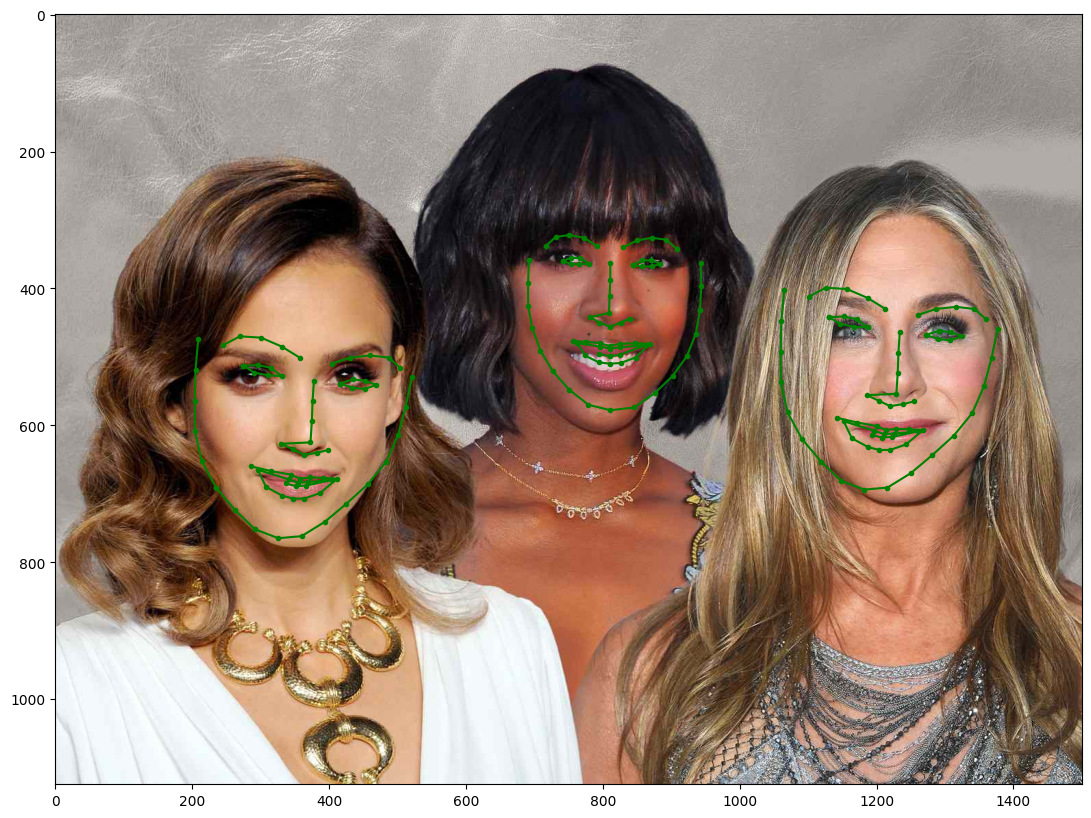

In [12]:
rects = detector(img, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)


def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


def get_faces(img, rects):
    faces_dlib_img = []
    for rect in rects:
        x, y, w, h = rect_to_bb(rect)
        faces_dlib_img.append(img[y:y + h, x:x + w, :])
    return faces_dlib_img


faces_dlib_img = get_faces(img, rects)

def get_faces_landmarks(img, faces):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_landmarks = []
    for face in faces:
        rows, cols, _ = face.shape
        rect = dlib.rectangle(0, 0, cols, rows)
        shape = predictor(gray, rect)
        kps = list(map(lambda p: (p.x, p.y), shape.parts()))
        landmarks = np.array(kps)
        faces_landmarks.append(landmarks)
    return faces_landmarks


def plot_landmarks(vec, rect):
    plt.plot(rect.left() + vec[0:17, 0], rect.top() + vec[0:17, 1], 'g.-')  # Contour
    plt.plot(rect.left() + vec[48:68, 0], rect.top() + vec[48:68, 1], 'g.-')  # Mouth
    plt.plot(rect.left() + vec[17:22, 0], rect.top() + vec[17:22, 1], 'g.-')  # Right eyebrow
    plt.plot(rect.left() + vec[22:27, 0], rect.top() + vec[22:27, 1], 'g.-')  # Left eyebrow
    plt.plot(rect.left() + np.concatenate((vec[36:42, 0], vec[36:37, 0])), rect.top() + np.concatenate((vec[36:42, 1], vec[36:37, 1])),
             'g.-')  # Left eye
    plt.plot(rect.left() + np.concatenate((vec[42:48, 0], vec[42:43, 0])), rect.top() + np.concatenate((vec[42:48, 1], vec[42:43, 1])),
             'g.-')  # Right eye
    plt.plot(rect.left() + vec[27:36, 0], rect.top() + vec[27:36, 1], 'g.-')  # Nose

plt.imshow(img)
faces_landmarks = get_faces_landmarks(img, faces_dlib_img)
index = 0
for landmark in faces_landmarks:
    plot_landmarks(landmark, rects[index])
    index+=1

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

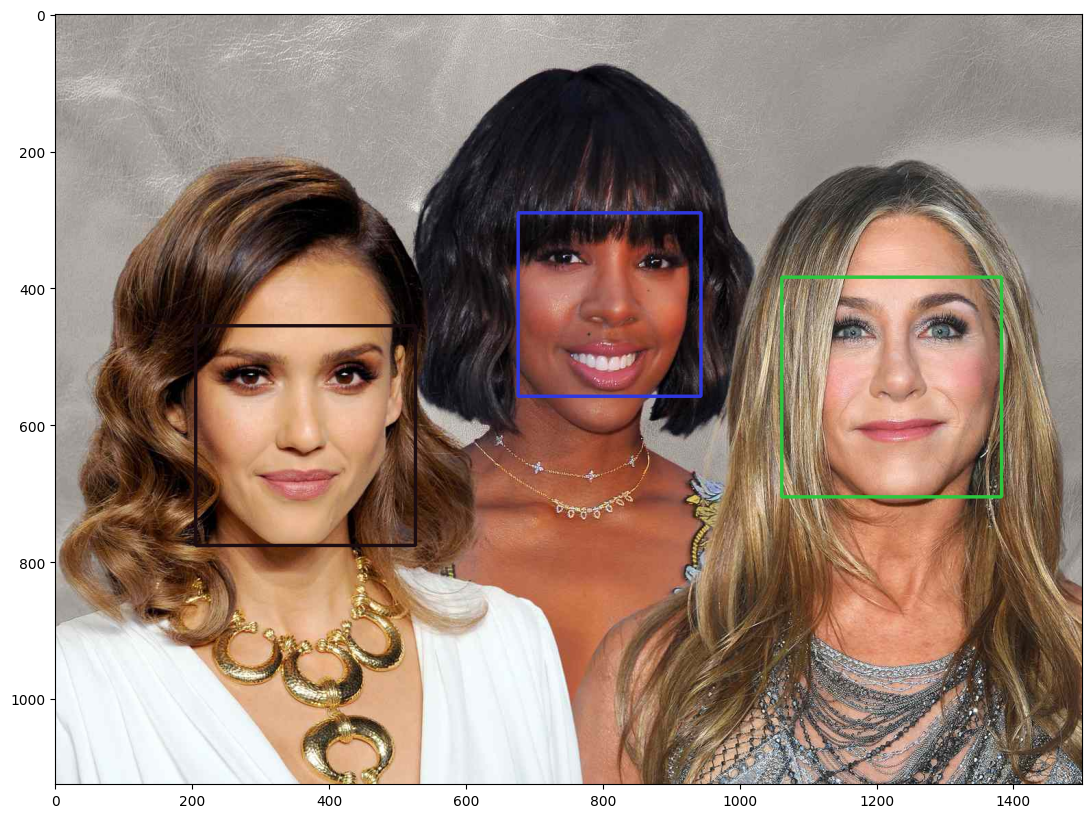

In [13]:
import random

def draw_rects(img, rects, line=3):
    result_dlib = np.copy(img)
    for rect in rects:
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x + w, y + h), (random.randrange(255), random.randrange(255), random.randrange(255)), line)

    return result_dlib


def detect_faces(img, line=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rects = detector(gray, 1)
    return draw_rects(img, rects, line)


result_dlib = detect_faces(img)

plt.imshow(result_dlib)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

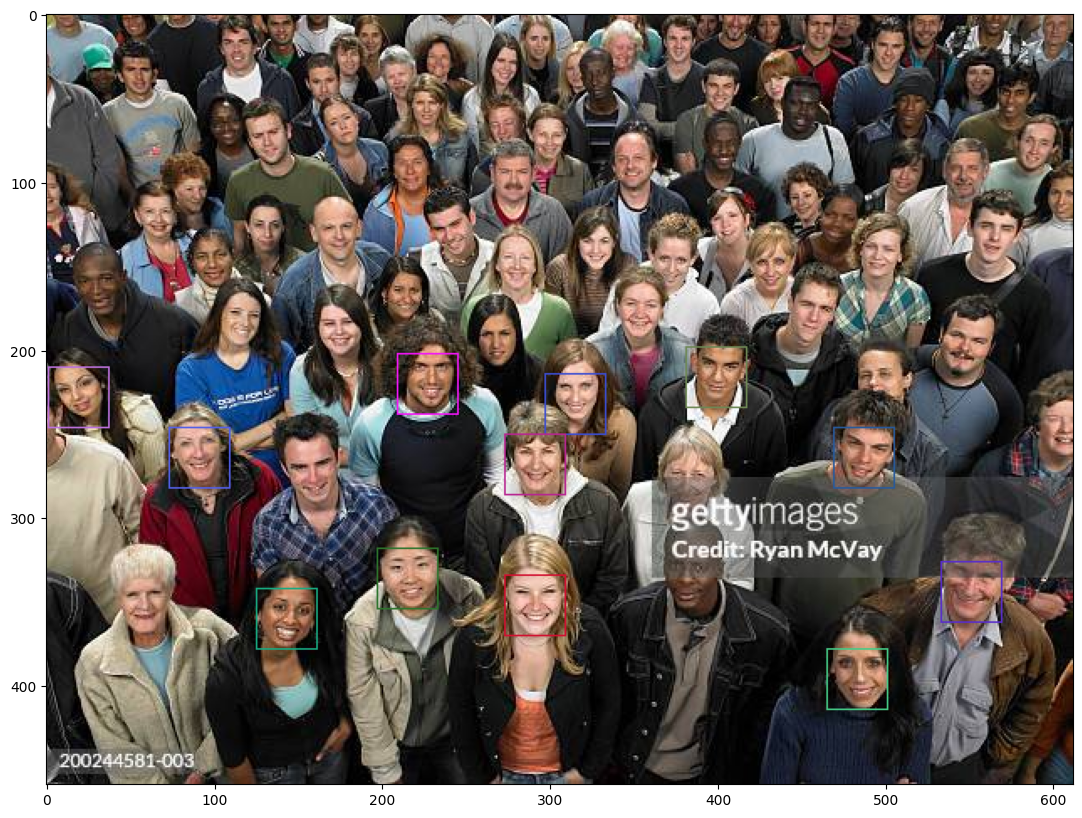

In [14]:
img2 = cv2.imread('data/faces2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

detected_faces2 = detect_faces(img2, 1)

plt.imshow(detected_faces2)

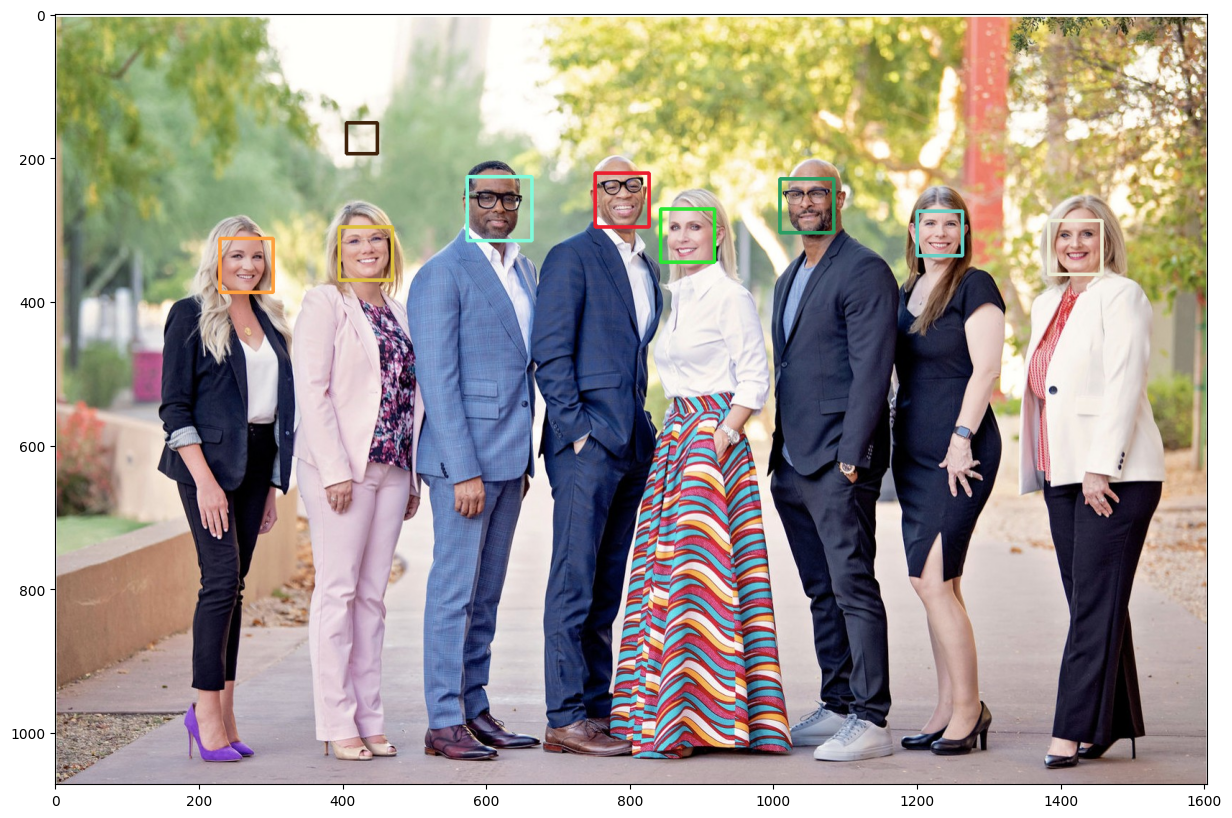

In [15]:
img3 = cv2.imread('data/faces3.jpeg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

detected_faces3 = detect_faces(img3)

plt.imshow(detected_faces3)

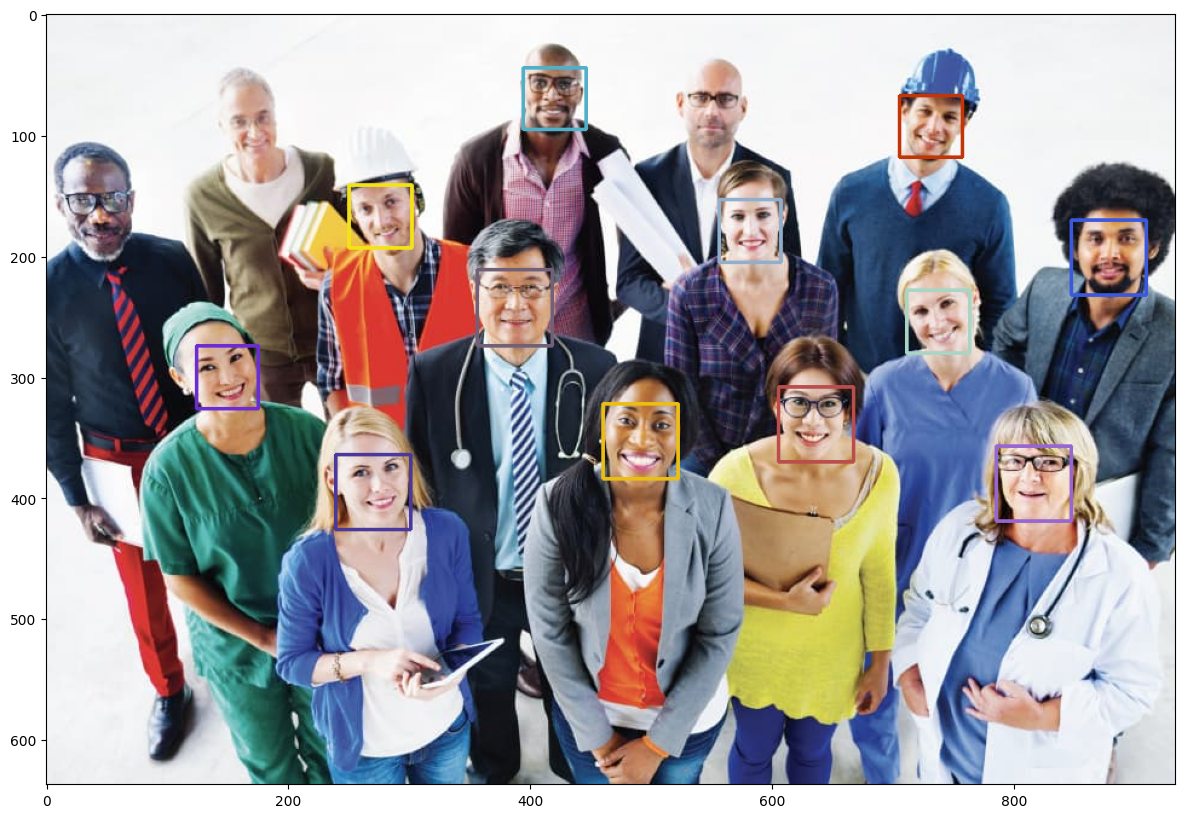

In [16]:
img4 = cv2.imread('data/faces4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

detected_faces4 = detect_faces(img4, 2)

plt.imshow(detected_faces4)